# 量子テレポーテーション

## 参考
* https://qiskit.org/textbook/ja/ch-algorithms/teleportation.html

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

/usr/local/lib/python3.6/dist-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  "future release.", DeprecationWarning)


In [2]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [3]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [4]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [5]:
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

# Step0
* 量子回路の準備

* Qiskitの記載法から各量子ビットは古典コンピュータでいうレジスタに相当することがわかる

In [6]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

<IPython.core.display.Math object>

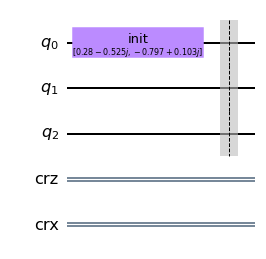

In [7]:
## STEP 0
# First, let's initialize Alice's q0
psi = random_state(1)
array_to_latex(psi, pretext="|\\psi\\rangle =")

init_gate = Initialize(psi)
init_gate.label = "init"

teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

teleportation_circuit.draw('mpl')

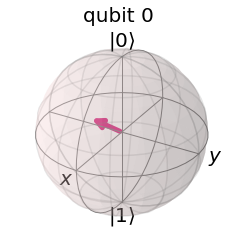

In [8]:
plot_bloch_multivector(psi)

# Step1
* ベル状態の作成

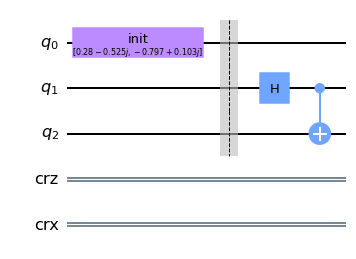

In [9]:
## STEP 1
# In our case, Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw('mpl')

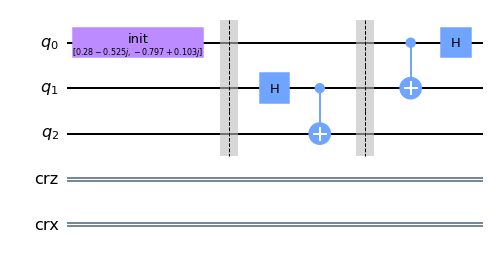

In [10]:
## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw('mpl')

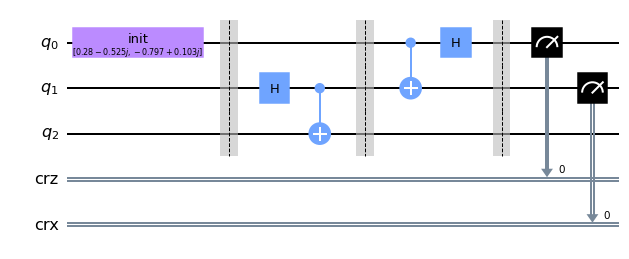

In [11]:
## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw()
teleportation_circuit.draw('mpl')

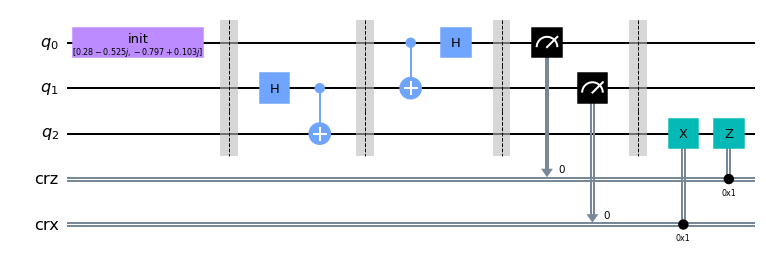

In [12]:
## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw('mpl')

* q0とq1は重ね合わせ状態が壊れているが、q2はpsiが再現されていることがわかる

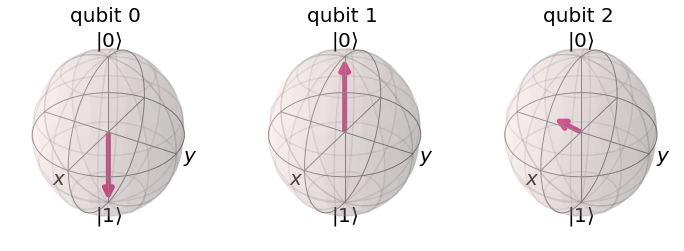

In [13]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(teleportation_circuit, backend).result().get_statevector()
plot_bloch_multivector(out_vector)